In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import random

# Portfolio Diversification

Name: Kelly Wang

Student Number: 21016953


### Note 

There will be information taken from Yahoo Finance API and an external CSV with industries. 

**Language:** Python 

**Libraries Used:** pandas, matplotlib, yfinance, random

## Within-Industry Diversification


###  Single Industry
#### Technology industry
5 random stocks are chosen from the tech industry using a random_selection function. 



In [2]:
#extract data from csv file
industries = pd.read_csv('industries.csv')

#dropping any unncessary columns
industries.drop('Unnamed: 0', axis=1, inplace=True)
industries.head()

,industry,ticker
0,Industrials,CNR.TO
1,Industrials,CP.TO
2,Industrials,TRI.TO
3,Industrials,WCN.TO
4,Industrials,WSP.TO


In [3]:
def random_selection(df, industry_name, n, seed):
    ''' 
    Params:
        df (DataFrame): DataFrame with the industries and tickers
        industry (Str): Industry in which the random drawing will take place
        n (Int): Sample size 
        seed (Int): You will call this function with the INT as your student number, this will produce the same results each time.
    Insert your dataframe into this function and the sample size and it will output the tickers as a list.
    '''
    
    #Create a List called "ticker_1st" which will contain all of the firms in the given industy
    ticker_lst = []
        
    #loop through and add values into the list
    for index, row in df.iterrows():
        if (row["industry"] == industry_name):
            ticker_lst.append(row["ticker"])
            
    random.seed(seed)
    
    return random.sample(ticker_lst, n)

In [4]:
#generate five random tickers in the technology industry
tech_list = random_selection(industries, 'Technology', 5, 21016953)
tech_list

['GIB-A.TO', 'SHOP.TO', 'DSG.TO', 'BB.TO', 'KXS.TO']

In [5]:
#extract the data history for each ticker 
technology_pf = pd.DataFrame()
start_date = '2019-01-01'
#it isnt inclusive of the end date here, and so we end it a month later to capture 
#all the closing dates to 2021-12-01
end_date= '2022-01-01'

#iterate through the ticker list to add the values into the dataframe
for i in tech_list:
    info = yf.Ticker(i)
    technology_pf[i] = info.history(start = start_date, end = end_date, interval='1mo').Close
    
technology_pf.head()


,GIB-A.TO,SHOP.TO,DSG.TO,BB.TO,KXS.TO
Date,,,,,
2019-01-01,86.870003,22.118000,40.840000,10.58,78.129997
2019-02-01,88.230003,24.927999,45.450001,11.44,82.730003
2019-03-01,91.870003,27.586000,48.580002,13.47,77.970001
2019-04-01,96.430000,32.575001,53.500000,12.29,73.209999
2019-05-01,98.519997,37.183998,54.209999,10.61,78.309998


In [6]:
#determine how much money would be in each stock with 10000

#determine the number of tickers
number_of_tickers = len(tech_list)
#find the amount of money that would be invested into each stock
money_per_stock = 10000/number_of_tickers
#initialize values
share_number = []
i = 0
x=0

while i < number_of_tickers:
    #add the number of shares purchased with the allocated amounts of money into a list
    share_number.append([money_per_stock / technology_pf.iloc[0,i]])
    i += 1
    
for y in tech_list:
    #using the share_number list, caluculate the value of each stock in the portfolio
    technology_pf[y + " Value"] = (technology_pf[y]) * share_number[x]
    x+=1
    
technology_pf.head()

,GIB-A.TO,SHOP.TO,DSG.TO,BB.TO,KXS.TO,GIB-A.TO Value,SHOP.TO Value,DSG.TO Value,BB.TO Value,KXS.TO Value
Date,,,,,,,,,,
2019-01-01,86.870003,22.118000,40.840000,10.58,78.129997,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
2019-02-01,88.230003,24.927999,45.450001,11.44,82.730003,2031.311168,2254.091641,2225.759089,2162.570825,2117.752624
2019-03-01,91.870003,27.586000,48.580002,13.47,77.970001,2115.114535,2494.438955,2379.040237,2546.313868,1995.904364
2019-04-01,96.430000,32.575001,53.500000,12.29,73.209999,2220.098935,2945.564763,2619.980402,2323.251427,1874.056103
2019-05-01,98.519997,37.183998,54.209999,10.61,78.309998,2268.216727,3362.329149,2654.750190,2005.671027,2004.607713


In [7]:
value_col = []
# adding the values of tickers into a list
for col in technology_pf.columns:
    if "Value" in col:
        value_col.append(col)
#summing the portfolio values to create the total value
technology_pf["Portfolio Values"] = technology_pf[value_col].sum(axis=1)

#calculate rate of return finding the percent change in the total value
technology_pf["Rate of Return(%)"] = (technology_pf["Portfolio Values"].pct_change()) * 100

technology_pf

,GIB-A.TO,SHOP.TO,DSG.TO,BB.TO,KXS.TO,GIB-A.TO Value,SHOP.TO Value,DSG.TO Value,BB.TO Value,KXS.TO Value,Portfolio Values,Rate of Return(%)
Date,,,,,,,,,,,,
2019-01-01,86.870003,22.118000,40.840000,10.580000,78.129997,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,10000.000000,NaN
2019-02-01,88.230003,24.927999,45.450001,11.440000,82.730003,2031.311168,2254.091641,2225.759089,2162.570825,2117.752624,10791.485347,7.914853
2019-03-01,91.870003,27.586000,48.580002,13.470000,77.970001,2115.114535,2494.438955,2379.040237,2546.313868,1995.904364,11530.811960,6.851018
2019-04-01,96.430000,32.575001,53.500000,12.290000,73.209999,2220.098935,2945.564763,2619.980402,2323.251427,1874.056103,11982.951630,3.921143
2019-05-01,98.519997,37.183998,54.209999,10.610000,78.309998,2268.216727,3362.329149,2654.750190,2005.671027,2004.607713,12295.574806,2.608900
2019-06-01,100.680000,39.358002,48.450001,9.760000,81.669998,2317.946290,3558.911444,2372.673878,1844.990605,2090.618227,12185.140443,-0.898163
2019-07-01,101.580002,41.941002,47.950001,9.630000,83.019997,2338.666942,3792.476882,2348.188080,1820.415914,2125.175978,12424.923794,1.967834
2019-08-01,104.419998,51.282001,47.220001,9.140000,77.559998,2404.051914,4637.128260,2312.438837,1727.788357,1985.408941,13066.816308,5.166169
2019-09-01,104.760002,41.230000,53.480000,6.940000,86.220001,2411.879793,3728.185142,2619.000947,1311.909283,2207.090855,12278.066021,-6.036285


The concept of diversification revolves around the reduction of risk on a portfolio. It discusses how having a portfolio that has a larger range and variety of assets can often reduce the overall volatility of your portfolio. This can be throughly demonstrated by comparing the rate of return for one stock by the rate of return for five, as an example of diversification. 

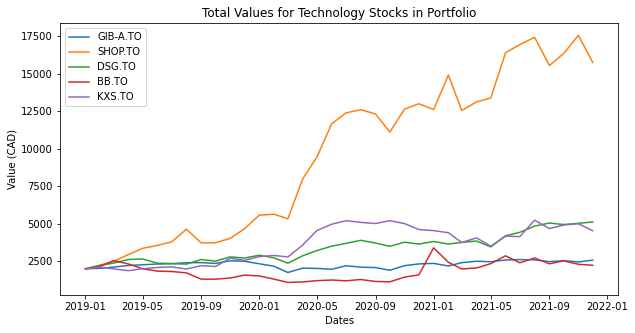

In [8]:
#graph the closing prices of each of the technology stocks
plt.figure(figsize=(10,5))

#add each stock onto the plot
for i in tech_list:
    plt.plot(technology_pf.index, technology_pf[i + " Value"], label=i)

#labels
plt.xlabel("Dates")
plt.ylabel("Value (CAD)")
plt.title("Total Values for Technology Stocks in Portfolio")
plt.legend(loc='best')

plt.show()

In the graph, I plot the total value of each of the five stocks in the portfolio. It can be observed that each of the stocks have different fluctuations in value, sometimes decreasing and sometimes increasing. Particularly, I decided to take a closer look at SHOP.TO, measuring its rate of return. 

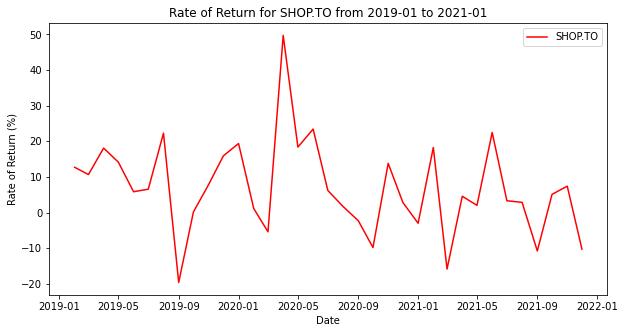

In [9]:
#graphing rate of return for just a single stock
plt.figure(figsize=(10,5))

#creating the list of the rate of return for SHOP.TO
SHOP_return = []
SHOP_return = technology_pf['SHOP.TO Value'].pct_change() * 100

plt.plot(technology_pf.index, SHOP_return, label='SHOP.TO', color = 'red')
plt.title('Rate of Return for SHOP.TO from 2019-01 to 2021-01')
plt.xlabel('Date')
plt.ylabel('Rate of Return (%)')
plt.legend(loc='best')
plt.show()

In this plot of the rate of return for SHOP.TO, it can be seen that the lowest rate of return is during September of 2019, where the percentage is as low as around -20%. Now, let's compare this to the rate of return for the portfolio holding five assets.

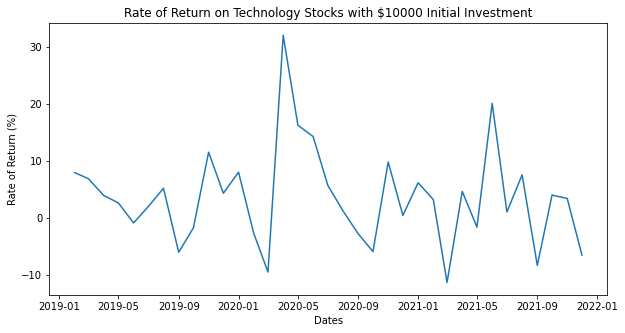

In [102]:
#graph the rate of return of the whole portfolio
plt.figure(figsize=(10,5))

plt.plot(technology_pf.index, technology_pf["Rate of Return(%)"])
plt.xlabel("Dates")
plt.ylabel("Rate of Return (%)")
plt.title("Rate of Return on Technology Stocks with $10000 Initial Investment")
plt.show()

In this plot with the rate of return for the five technology stocks, it can be seen that the rate of return on September 2019, is less than -10%, which is far less than the -20% from the portfolio with just SHOP.TO. This helps demonstrate the concept of diversification since losses from one stock are better made up for by the other investments within the portfolio. Thus, it can be seen that the more diversified portfolio holds less risk. Of course, with less risk, comes the possibility that there are less dramatic highs. However, by having a well strategized and combined portfolio of investments, that obstacle can be easily mitigated. Overall, a more diversified portfolio is capable of counter the risk of large losses.

In [214]:
%%latex
\newpage

<IPython.core.display.Latex object>

### Multi-Industry 
Forming a portfolio of five random stocks for each of the 4 remaining industries.  

Creates a new multi-industry portfolio with the technolgoy portfolio and four other remaining portfolios. They are weighed evenly.  

In [219]:
#creating a function that produces a portfolio with the close prices and the total portfolio value
#when given a ticker list and an initial investment amount 
def portfolio_values(r_ticker_lst, initial_investment):
    
    #logic is very similar to 1a)
    close_prices = pd.DataFrame()
    portfolio = pd.DataFrame()
    start_date = '2019-01-01'
    #so that we can get the data for 2021-12-01
    end_date= '2022-01-01'

    for i in r_ticker_lst:
        info = yf.Ticker(i)
        close_prices[i] = info.history(start = start_date, end = end_date, interval='1mo').Close
    
    number_of_tickers = len(r_ticker_lst)
    money_per_stock = initial_investment/number_of_tickers
    share_number = []
    i = 0
    x=0

    while i < number_of_tickers:
        share_number.append([money_per_stock / close_prices.iloc[0,i]])
        i += 1
    
    for y in r_ticker_lst:
        portfolio[y + " Value"] = (close_prices[y]) * share_number[x]
        x+=1
        
    portfolio["Total Value"] = portfolio[list(portfolio.columns)].sum(axis=1)
    
    
    return portfolio   

In [221]:
#industrials industry portfolio
i_list = random_selection(industries, 'Industrials', 5, 21016953)
industrials_pf = portfolio_values(i_list, 10000)
industrials_pf.dropna(inplace=True)

#healthcare industry portfolio
h_list = random_selection(industries, 'Healthcare', 5, 21016953)
healthcare_pf = portfolio_values(h_list, 10000)
healthcare_pf.dropna(inplace=True)

#energy industry portfolio
e_list = random_selection(industries, 'Energy', 5, 21016953)
energy_pf = portfolio_values(e_list, 10000)
energy_pf.dropna(inplace=True)

#financial services industry portfolio
fs_list = random_selection(industries, 'Financial Services', 5, 21016953)
finserv_pf = portfolio_values(fs_list, 10000)
finserv_pf.dropna(inplace=True)



In [222]:
#calulating the rate of return and the standard deviation of the five portfolios 
#portfolio with just technology industry
port1 = technology_pf
std1 = port1["Rate of Return(%)"].std()

#portfolio with technology and industrials industries
port2 = portfolio_values((tech_list + i_list), 10000)
port2["Rate of Return(%)"] = (port2["Total Value"].pct_change())*100
std2 = port2["Rate of Return(%)"].std()

#portfolio with technology, industrials and healthcare industries
port3 = portfolio_values((tech_list + i_list + h_list), 10000)
port3["Rate of Return(%)"] = (port3["Total Value"].pct_change())*100
std3 = port3["Rate of Return(%)"].std()


#portfolio with technology, industrials, healthcare, and energy industries 
port4 = portfolio_values((tech_list + i_list + h_list + e_list), 10000)
port4["Rate of Return(%)"] = (port4["Total Value"].pct_change())*100
std4 = port4["Rate of Return(%)"].std()


#portfolio with technology, industrials, healthcare, energy, and financial services industries
port5 = portfolio_values((tech_list + i_list + h_list + e_list + fs_list), 10000)
port5["Rate of Return(%)"] = (port5["Total Value"].pct_change())*100
std5 = port5["Rate of Return(%)"].std()



In [224]:
#display the final portfolio containing the values of 25 stocks across 5 industries 
# and the total portfolio value, and the rate of return (%)
port5

,GIB-A.TO Value,SHOP.TO Value,DSG.TO Value,BB.TO Value,KXS.TO Value,TIH.TO Value,TRI.TO Value,WCN.TO Value,CAE.TO Value,CP.TO Value,...,SU.TO Value,MEG.TO Value,TRP.TO Value,MFC.TO Value,NA.TO Value,TD.TO Value,FFH.TO Value,BNS.TO Value,Total Value,Rate of Return(%)
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,10000.000000,NaN
2019-02-01,406.262234,450.818328,445.151818,432.514165,423.550525,469.258466,416.591487,400.218831,397.564480,403.876544,...,428.126447,397.790075,421.259787,421.411642,401.876928,411.961810,428.287362,391.122993,10528.035202,5.280352
2019-03-01,423.022907,498.887791,475.808047,509.262774,399.180873,467.545849,460.311386,432.634413,424.212073,408.956274,...,408.777748,375.690613,429.634976,432.989195,390.355947,395.911257,406.903507,380.427801,10811.680967,2.694195
2019-04-01,444.019787,589.112953,523.996080,464.650285,374.811221,479.139109,481.967711,454.454306,447.995798,446.905708,...,420.886267,439.042374,463.421022,472.647904,417.416187,417.202616,419.971776,394.545397,11393.150656,5.378162
2019-05-01,453.643345,672.465830,530.950038,401.134205,400.921543,408.578361,500.072674,467.356203,495.584615,441.084322,...,396.783920,321.178657,477.554164,434.521833,397.075118,407.464389,407.560886,371.170218,11017.280654,-3.299087
2019-06-01,463.589258,711.782289,474.534776,368.998121,418.123645,426.871958,491.806174,458.020715,506.223790,459.203584,...,389.162530,369.797432,470.523851,460.820235,406.885946,421.910400,422.522323,380.806763,11187.244255,1.542700
2019-07-01,467.733388,758.495376,469.637616,364.083183,425.035196,457.305782,516.023763,438.286596,513.194279,470.423307,...,364.448380,408.839806,473.825166,462.756506,422.396230,425.383998,401.940481,386.189954,11703.268193,4.612610
2019-08-01,480.810383,927.425652,462.487767,345.557671,397.081788,440.519579,532.615297,447.769192,502.523761,478.574397,...,374.745649,374.217317,500.222092,427.710899,413.403455,401.932749,389.976585,388.053453,11575.636731,-1.090563
2019-09-01,482.375959,745.637028,523.800189,262.381857,441.418171,442.108349,518.264167,446.382767,485.364451,439.535400,...,402.173113,427.256013,503.008444,475.857733,435.885365,430.045911,383.896054,412.443826,11261.560669,-2.713251


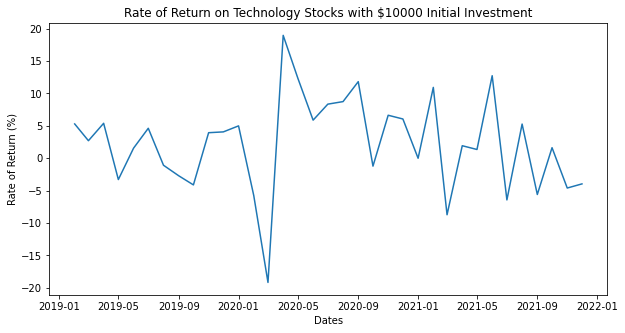

In [125]:
#graph the rate of return of the five technology stocks
plt.figure(figsize=(10,5))

plt.plot(port5.index, port5["Rate of Return(%)"])
plt.xlabel("Dates")
plt.ylabel("Rate of Return (%)")
plt.title("Rate of Return on Technology Stocks with $10000 Initial Investment")
plt.show()

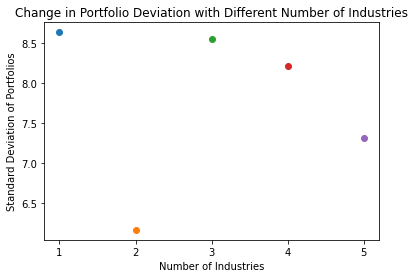

In [124]:
#graph the standard deviation of the rate of return of the five different portfolios

std_list = [std1, std2, std3, std4, std5]
i=1
for j in std_list:
    plt.scatter(i, j)
    i+=1
    
plt.xlabel("Number of Industries")
plt.ylabel("Standard Deviation of Portfolios")
plt.title("Change in Portfolio Deviation with Different Number of Industries")
plt.xticks([1, 2, 3, 4, 5])
plt.show()

In the above plot, it shows the standard deviation of the rate of returns of the five portfolios. A general trend from the graph can be observed. As the number of industries within the portfolio increase, the standard deviation decreases, with two industries in the portfolio being an outlier. This can suggest that as more industries are added within a portfolio, the less risk and fluctuation that exists. This larger diversified, multi-industry portfolio is able to perform more stably since the other four remaining industries can help offset any fluctuations from one particular industry. Thus, with increase numbered of industries, it can be argued that, to an extent, this is the better investment as the portfolio is less volatile. 

In [225]:
%%latex
\newpage

<IPython.core.display.Latex object>

## Adding Crypto

Equally weighted portfolio with $\$10,000$ containing Bitcoin (BTC-CAD) and Etherium (ETH-CAD).  



In [226]:
#resetting the start dates 
start_date = '2019-01-01'
#the date reaches 2021-12-01 and does not need to be adjusted
end_date= '2021-12-01'

#extracting data for Bitcoin
btc = yf.Ticker('BTC-CAD')
btc_hist = btc.history(start=start_date, end=end_date, interval='1mo')
bitcoin_pf = pd.DataFrame({'BTC Close Price' : btc_hist.Close,
                           #equally weighted profile each has $10000/2 = $5000
                          'BTC Value' : 5000/btc_hist.loc['2019-01-01', 'Close'] * btc_hist.Close})
bitcoin_pf['Rate of Return (%)'] = bitcoin_pf['BTC Value'].pct_change() * 100
bitcoin_pf.head()


,BTC Close Price,BTC Value,Rate of Return (%)
Date,,,
2019-01-01,4540.254883,5000.000000,NaN
2019-02-01,5074.797852,5588.670661,11.773413
2019-03-01,5480.324707,6035.261068,7.990995
2019-04-01,7165.559570,7891.142409,30.750639
2019-05-01,11601.275391,12776.017746,61.903272


In [227]:
#extracting data from Ethereum 
eth = yf.Ticker('ETH-CAD')
eth_hist = eth.history(start=start_date, end=end_date, interval='1mo')
ether_pf = pd.DataFrame({'ETH Close Price' : eth_hist.Close,
                          'ETH Value' : 5000/eth_hist.loc['2019-01-01', 'Close'] * eth_hist.Close})
ether_pf['Rate of Return (%)'] = ether_pf['ETH Value'].pct_change() * 100
ether_pf.head()

,ETH Close Price,ETH Value,Rate of Return (%)
Date,,,
2019-01-01,140.576462,5000.000000,NaN
2019-02-01,180.025482,6403.116136,28.062323
2019-03-01,188.907867,6719.043324,4.933960
2019-04-01,217.168701,7724.219916,14.960115
2019-05-01,362.756836,12902.474259,67.039188


In [232]:
#combining the two cryptocurrencies to form one dataframe
crypto_pf['BTC Close Price'] = bitcoin_pf['BTC Close Price']
crypto_pf['BTC Value'] = bitcoin_pf['BTC Value']
crypto_pf['ETH Close Price'] = ether_pf['ETH Close Price']
crypto_pf['ETH Value'] = ether_pf['ETH Value']

#calculate the total value and 
crypto_pf['Total Value'] = crypto_pf['BTC Value'] + crypto_pf['ETH Value']
crypto_pf['Rate of Return (%)'] = crypto_pf['Total Value'].pct_change() * 100  

crypto_pf.head()

,BTC Close Price,BTC Value,ETH Close Price,ETH Value,Total Value,Rate of Return (%)
Date,,,,,,
2019-01-01,4540.254883,5000.000000,140.576462,5000.000000,10000.000000,NaN
2019-02-01,5074.797852,5588.670661,180.025482,6403.116136,11991.786798,19.917868
2019-03-01,5480.324707,6035.261068,188.907867,6719.043324,12754.304393,6.358665
2019-04-01,7165.559570,7891.142409,217.168701,7724.219916,15615.362324,22.432097
2019-05-01,11601.275391,12776.017746,362.756836,12902.474259,25678.492005,64.443780


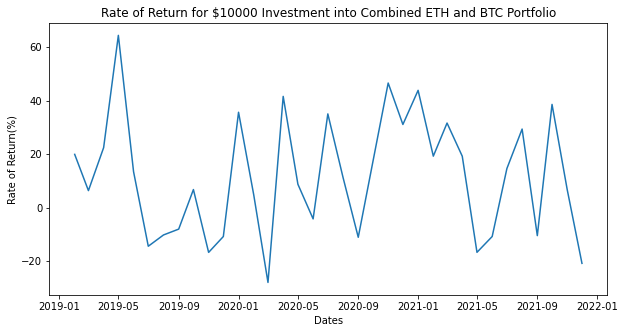

In [240]:
#graph the rate of return for the total value of the combined portfolio
plt.figure(figsize = (10,5))

plt.plot(crypto_pf.index, crypto_pf['Rate of Return (%)'])
plt.xlabel("Dates")
plt.ylabel("Rate of Return(%)")
plt.title("Rate of Return for $10000 Investment into Combined ETH and BTC Portfolio")

plt.show()


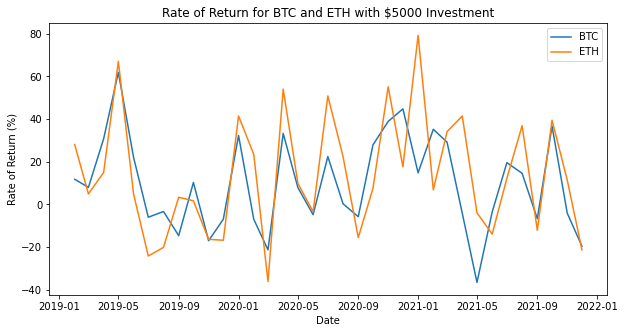

In [241]:
#plot the rate of return(%) of BTC and ETH
plt.figure(figsize = (10,5))

plt.plot(bitcoin_pf.index, bitcoin_pf['Rate of Return (%)'], label = 'BTC')
plt.plot(ether_pf.index, ether_pf['Rate of Return (%)'], label = 'ETH')

plt.xlabel("Date")
plt.ylabel("Rate of Return (%)")
plt.title("Rate of Return for BTC and ETH with $5000 Investment")
plt.legend(loc='best')

plt.show()



Similarly to Q1a), diversification benefits can be observed by analyzing the above two plots. In the plot with the rate of return for BTC and ETC individually, it can be seen that the rate of return for BTC around 2020-01 to 2020-05 drops to as low as -40%. However, when examining the combined portfolio plot at the same date range, the combined portfolio has a rate of return only slightly more than -20%. In another example, where ETH has a rate of return on 2021-05 of close to -40%, the combined portfolio only has a rate of return of slightly less than -20%. Generally, it can be observed that the combined portfolio experiences less fluctuations in value, allowing it to be more stable and secure of an investment, compared to a less diversified portfolio. Thus, in cryptocurrency as well, a more diversified portfolio can allow for less risk. 

In [242]:
%%latex
\newpage

<IPython.core.display.Latex object>

### Combined portfolio
Equally weighted so that there will be $\$5000$ in the cyrpto portfolio and $\$5000 in the inter-industy porfolio

In [243]:
#five industries altogether with $5000 initial investment
inter_industry_pf = portfolio_values((tech_list + i_list + h_list + e_list + fs_list), 5000)
inter_industry_pf["Rate of Return(%)"] = (inter_industry_pf["Total Value"].pct_change())*100

inter_industry_pf.head()


,GIB-A.TO Value,SHOP.TO Value,DSG.TO Value,BB.TO Value,KXS.TO Value,TIH.TO Value,TRI.TO Value,WCN.TO Value,CAE.TO Value,CP.TO Value,...,SU.TO Value,MEG.TO Value,TRP.TO Value,MFC.TO Value,NA.TO Value,TD.TO Value,FFH.TO Value,BNS.TO Value,Total Value,Rate of Return(%)
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,5000.000000,NaN
2019-02-01,203.131117,225.409164,222.575909,216.257082,211.775262,234.629217,208.295720,200.109401,198.782240,201.938316,...,214.063265,198.895037,210.629910,210.705776,200.938478,205.980832,214.143681,195.561459,5264.017391,5.280348
2019-03-01,211.511454,249.443896,237.904024,254.631387,199.590436,233.772881,230.155716,216.317177,212.106022,204.478108,...,204.388874,187.845306,214.817455,216.494595,195.177959,197.955616,203.451754,190.213864,5405.840333,2.694196
2019-04-01,222.009894,294.556476,261.998040,232.325143,187.405610,239.569593,240.983785,227.227122,223.997885,223.452870,...,210.443154,219.521187,231.710478,236.323926,208.708094,208.601356,209.985888,197.272711,5696.575350,5.378165
2019-05-01,226.821673,336.232915,265.475019,200.567103,200.460771,204.289208,250.036384,233.678085,247.792307,220.542133,...,198.391960,160.589329,238.777049,217.260915,198.537602,203.732195,203.780443,185.585073,5508.640321,-3.299088


In [244]:
#crypto portfolio with $5000 initial investment 
#this means there is $2500 in ETH and $2500 in BTC
crypto_pf = pd.DataFrame()
crypto_pf['BTC Close Price'] = bitcoin_pf['BTC Close Price']
crypto_pf['BTC Value'] = 2500/btc_hist.loc['2019-01-01', 'Close'] * btc_hist.Close
crypto_pf['ETH Close Price'] = ether_pf['ETH Close Price']
crypto_pf['ETH Value'] = 2500/eth_hist.loc['2019-01-01', 'Close'] * eth_hist.Close

crypto_pf['Total Value'] = crypto_pf['BTC Value'] + crypto_pf['ETH Value']
crypto_pf['Rate of Return (%)'] = crypto_pf['Total Value'].pct_change() * 100  

crypto_pf.head()

,BTC Close Price,BTC Value,ETH Close Price,ETH Value,Total Value,Rate of Return (%)
Date,,,,,,
2019-01-01,4540.254883,2500.000000,140.576462,2500.000000,5000.000000,NaN
2019-02-01,5074.797852,2794.335331,180.025482,3201.558068,5995.893399,19.917868
2019-03-01,5480.324707,3017.630534,188.907867,3359.521662,6377.152196,6.358665
2019-04-01,7165.559570,3945.571204,217.168701,3862.109958,7807.681162,22.432097
2019-05-01,11601.275391,6388.008873,362.756836,6451.237129,12839.246002,64.443780


In [245]:
#combined portfolio of the inter-industry stocks and the cryptocurrency portfolio
combined_pf = pd.DataFrame() 
combined_pf['Total Industry Value'] = inter_industry_pf['Total Value']
combined_pf['Total Crypto Value'] = crypto_pf['Total Value']
combined_pf['Total Portfolio Value'] = combined_pf['Total Industry Value']  + combined_pf['Total Crypto Value'] 
combined_pf['Rate of Return (%)'] = combined_pf['Total Portfolio Value'].pct_change() * 100

combined_pf.head()

,Total Industry Value,Total Crypto Value,Total Portfolio Value,Rate of Return (%)
Date,,,,
2019-01-01,5000.000000,5000.000000,10000.000000,NaN
2019-02-01,5264.017391,5995.893399,11259.910790,12.599108
2019-03-01,5405.840333,6377.152196,11782.992529,4.645523
2019-04-01,5696.575350,7807.681162,13504.256512,14.608038
2019-05-01,5508.640321,12839.246002,18347.886324,35.867430


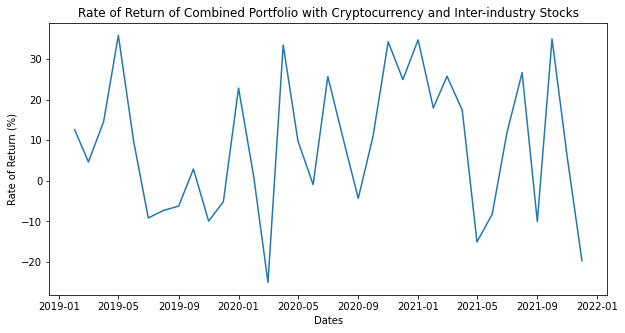

In [253]:
#graph the rate of return of the combined portfolio 
plt.figure(figsize = (10,5))

plt.plot(combined_pf.index, combined_pf['Rate of Return (%)'])
plt.xlabel("Dates")
plt.ylabel("Rate of Return (%)")
plt.title("Rate of Return of Combined Portfolio with Cryptocurrency and Inter-industry Stocks")

plt.show()


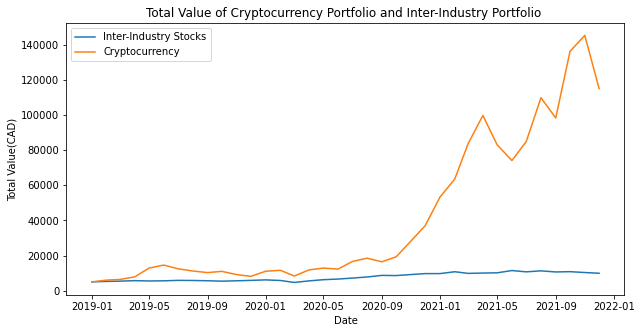

In [251]:
#graph the total value of inter-industry stocks and cryptocurrency 
plt.figure(figsize = (10,5))

plt.plot(combined_pf.index, combined_pf['Total Industry Value'], label = 'Inter-Industry Stocks')
plt.plot(combined_pf.index, combined_pf['Total Crypto Value'], label = 'Cryptocurrency')

plt.xlabel("Date")
plt.ylabel("Total Value(CAD)")
plt.title("Total Value of Cryptocurrency Portfolio and Inter-Industry Portfolio ")
plt.legend(loc='best')

plt.show()

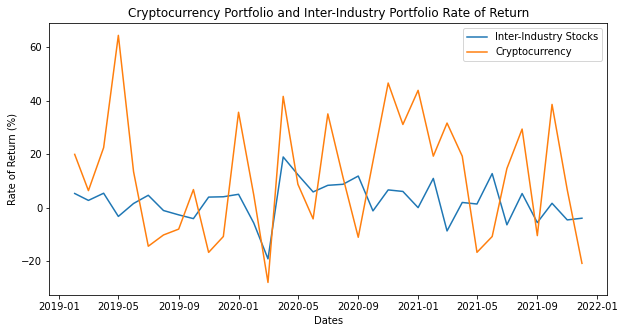

In [249]:
#graph the rate of return of inter-industry stocks and cryptocurrency separately 
plt.figure(figsize = (10,5))

plt.plot(combined_pf.index, inter_industry_pf["Rate of Return(%)"], label = 'Inter-Industry Stocks')
plt.plot(combined_pf.index, crypto_pf["Rate of Return (%)"], label = 'Cryptocurrency')

plt.xlabel("Dates")
plt.ylabel("Rate of Return (%)")
plt.title("Cryptocurrency Portfolio and Inter-Industry Portfolio Rate of Return")
plt.legend(loc='best')

plt.show()

When comparing the plot with the cryptocurrency and inter-industry stocks and their respective rate of returns to the plot with the combined portfolio, it can be noticed that the large fluctuations in cryptocurrency influences the overall portfolio. For example, when the cryptocurrency portfolio drops to its lowest point of less than -20% in rate of return, at the same date, the combined portfolio drops to the same point. Similarly, it can be observed that in most of the fluctuations of the cryptocurrency portfolio, the overall combined portfolio follows its similar trend. Though the combined portfolio experiences greater losses, it also experiences greater gains due to the more volatile portfolio of cryptocurrency. From this, it can be understood that though cryptocurrency can allow for greater losses, the overall fluctuations can be offset by its greater gains. Thus, it may be a good idea to include the two portfolios, however, perhaps not equally weighted, since the cryptocurrency portfolio affects the overall portfolio disproportionally. 

In [256]:
%%latex
\newpage

<IPython.core.display.Latex object>

### Sharpe Ratio 
Find the optimal weight on each portfolio  to maximize the portfolio using sharpe ratio: $S=\frac{R_P-R_f}{\sigma_P}$. Where S is the sharpe ratio, $R_P$ is the expected return of the portfolio, found by taking a simple arithmetic average, $R_f$ is the risk-free rate, and $\sigma_P$ is the standard deviation of portfolio returns.  Assume the risk-free rate is zero, since these days it is close enough to zero anyways.


In [258]:
#intializing values
optimal_weight = 0
optimal_sharpe = 0
initial_investment = 10000
#temporary dataframe that will contain the different weights of the two portfolios 
temp_total = pd.DataFrame()
i = 0
#port5 represents the inter-industry portfolio
#crypto_pf represents the cryptocurrency portfolio 
while i < 101:
    #finding the total portfolio value if each portfolio is given a specific weight
    temp_total['Total Portfolio Value'] = crypto_pf['Total Value'] * (i/100) * initial_investment + port5['Total Value'] * (100-i) / 100 * initial_investment
    temp_total['Rate of Return (%)'] = temp_total['Total Portfolio Value'].pct_change() * 100
    #calculating sharpe value
    sharpe_value = temp_total['Rate of Return (%)'].mean()/temp_total['Rate of Return (%)'].std()
    
    if sharpe_value > optimal_sharpe:
        optimal_sharpe = sharpe_value 
        optimal_weight = i

    i+=1 #counter

print("The optimal weight is " + str(optimal_weight) + "% for cryptocurrency in the combined portfolio and " + str((100-optimal_weight)) + "% for inter-industries.")
print("The sharpe ratio is " + str(optimal_sharpe) + ".")


The optimal weight is 62% for cryptocurrency in the combined portfolio and 38% for inter-industries.
The sharpe ratio is 0.5172341865553873.


When the distribution for cryptocurrency and inter-industries to be 62% and 38%, respectively, the Sharpe ratio is maximized, implying that the return to risk ratio is optimized at this point. It is suggested to generally invest with this distribution. 